In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khalidmahamud","key":"c8ab918e2693d125a7288c376d45b6c6"}'}

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [3]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:47<00:00, 22.9MB/s]
100% 2.04G/2.04G [01:47<00:00, 20.3MB/s]


In [4]:
import zipfile

# Define the name of the downloaded zip file
zip_file_path = '/content/plantvillage-dataset.zip'  # Change this if the filename is different

# Create a directory to extract the files if needed
extract_dir = '/content/plantvillage-dataset'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [31]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Set the path to where the dataset is extracted
dataset_path = '/content/plantvillage-dataset/plantvillage dataset/color'

tomato_directories = []

# List the tomato directories directly
for dir_name in os.listdir(dataset_path):
    if 'Tomato' in dir_name:
        tomato_directories.append(os.path.join(dataset_path, dir_name))

# Print the tomato directories
for directory in tomato_directories:
    print(directory)


/content/plantvillage-dataset/plantvillage dataset/color/Tomato___Tomato_mosaic_virus
/content/plantvillage-dataset/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite
/content/plantvillage-dataset/plantvillage dataset/color/Tomato___Bacterial_spot
/content/plantvillage-dataset/plantvillage dataset/color/Tomato___Early_blight
/content/plantvillage-dataset/plantvillage dataset/color/Tomato___Leaf_Mold
/content/plantvillage-dataset/plantvillage dataset/color/Tomato___Septoria_leaf_spot
/content/plantvillage-dataset/plantvillage dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/plantvillage-dataset/plantvillage dataset/color/Tomato___healthy
/content/plantvillage-dataset/plantvillage dataset/color/Tomato___Late_blight
/content/plantvillage-dataset/plantvillage dataset/color/Tomato___Target_Spot


In [7]:
image_paths = []
labels = []

In [8]:
# Define a mapping from directory names to labels
label_mapping = {
    "Tomato___healthy": 0,
    "Tomato___Late_blight": 1,
    "Tomato___Early_blight": 2,
    "Tomato___Septoria_leaf_spot": 3,
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus": 4,
    "Tomato___Bacterial_spot": 5,
    "Tomato___Target_Spot": 6,
    "Tomato___Tomato_mosaic_virus": 7,
    "Tomato___Leaf_Mold": 8,
    "Tomato___Spider_mites Two-spotted_spider_mite": 9,
}

# Iterate through all the tomato directories
for directory in tomato_directories:
    # Get the label based on the directory name
    dir_name = os.path.basename(directory)  # Get the last part of the path
    label = label_mapping.get(dir_name, None)  # Get the corresponding label

    if label is not None:  # Proceed only if the label exists
        # Get all image files in the directory
        file_count = 0
        for file in os.listdir(directory):
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_paths.append(os.path.join(directory, file))
                labels.append(str(label))  # Append the label
                file_count += 1
        print(f"Directory: {directory}, Added {file_count} files.")
    else:
        print(f"Warning: No label found for directory {dir_name}")

print(f"Total images processed: {len(image_paths)}")

Directory: /content/plantvillage-dataset/plantvillage dataset/color/Tomato___Tomato_mosaic_virus, Added 373 files.
Directory: /content/plantvillage-dataset/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite, Added 1676 files.
Directory: /content/plantvillage-dataset/plantvillage dataset/color/Tomato___Bacterial_spot, Added 2127 files.
Directory: /content/plantvillage-dataset/plantvillage dataset/color/Tomato___Early_blight, Added 1000 files.
Directory: /content/plantvillage-dataset/plantvillage dataset/color/Tomato___Leaf_Mold, Added 952 files.
Directory: /content/plantvillage-dataset/plantvillage dataset/color/Tomato___Septoria_leaf_spot, Added 1771 files.
Directory: /content/plantvillage-dataset/plantvillage dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus, Added 5357 files.
Directory: /content/plantvillage-dataset/plantvillage dataset/color/Tomato___healthy, Added 1591 files.
Directory: /content/plantvillage-dataset/plantvillage dataset/color/Tomato___Late_

In [9]:
# Create a DataFrame to store the image paths and their labels
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

df.head(5)

,image_path,label
0,/content/plantvillage-dataset/plantvillage dat...,7
1,/content/plantvillage-dataset/plantvillage dat...,7
2,/content/plantvillage-dataset/plantvillage dat...,7
3,/content/plantvillage-dataset/plantvillage dat...,7
4,/content/plantvillage-dataset/plantvillage dat...,7


In [10]:
print(df['label'].value_counts())  # Counts the number of images for each label

label
4    5357
5    2127
1    1909
3    1771
9    1676
0    1591
6    1404
2    1000
8     952
7     373
Name: count, dtype: int64


In [11]:
# Define X and y
X = df['image_path']  # Your feature (image paths)
y = df['label']       # Your labels

In [12]:
from sklearn.model_selection import train_test_split

# First, split into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Then split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42
)


# Create DataFrames for each split
df_train = pd.DataFrame({'image_path': X_train, 'label': y_train})
df_val = pd.DataFrame({'image_path': X_val, 'label': y_val})
df_test = pd.DataFrame({'image_path': X_test, 'label': y_test})

# Print the sample counts
print(f"Training samples: {len(df_train)}, Validation samples: {len(df_val)}, Test samples: {len(df_test)}")


Training samples: 11622, Validation samples: 2906, Test samples: 3632


In [13]:
# Check class distribution in each set
train_class_distribution = y_train.value_counts()
val_class_distribution = y_val.value_counts()
test_class_distribution = y_test.value_counts()

print("Training Class Distribution:\n", train_class_distribution)
print("\nValidation Class Distribution:\n", val_class_distribution)
print("\nTest Class Distribution:\n", test_class_distribution)

Training Class Distribution:
 label
4    3429
5    1361
1    1222
3    1134
9    1073
0    1018
6     898
2     640
8     609
7     238
Name: count, dtype: int64

Validation Class Distribution:
 label
4    857
5    341
1    305
3    283
9    268
0    255
6    225
2    160
8    152
7     60
Name: count, dtype: int64

Test Class Distribution:
 label
4    1071
5     425
1     382
3     354
9     335
0     318
6     281
2     200
8     191
7      75
Name: count, dtype: int64


In [21]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for the training set
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: 1.1416502946954814, 1: 0.951063829787234, 2: 1.8159375, 3: 1.024867724867725, 4: 0.3389326334208224, 5: 0.853930933137399, 6: 1.2942093541202673, 7: 4.883193277310925, 8: 1.9083743842364531, 9: 1.0831314072693383}


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data augmentation for the training set
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a training generator with augmentation
train_generator = data_augmentation.flow_from_dataframe(
    dataframe=df_train,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Create a validation generator (without augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Create a test generator (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Found 11622 validated image filenames belonging to 10 classes.
Found 2906 validated image filenames belonging to 10 classes.
Found 3632 validated image filenames belonging to 10 classes.


In [26]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, Concatenate, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained ResNet50
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base.trainable = False  # Freeze ResNet50 layers

# Load pre-trained InceptionV3
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_base.trainable = False  # Freeze InceptionV3 layers

# Define the input
input_layer = Input(shape=(224, 224, 3))

# Extract features from ResNet50 and InceptionV3
resnet_features = resnet_base(input_layer)
resnet_features = GlobalAveragePooling2D()(resnet_features)

inception_features = inception_base(input_layer)
inception_features = GlobalAveragePooling2D()(inception_features)

# Concatenate the features directly
combined_features = Concatenate()([resnet_features, inception_features])

# Add a fully connected layer
fc_layer = Dense(128, activation='relu')(combined_features)

# Output layer
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(fc_layer)

# Build the model
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
ensemble_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
ensemble_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inception_v3 (Functional) │ (None, 5, 5, 2048)     │     21,802,784 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ inception_v3[0][0]     │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 4096)           │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │        524,416 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 10)             │          1,290 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 45,916,202 (175.16 MB)

 Trainable params: 525,706 (2.01 MB)

 Non-trainable params: 45,390,496 (173.15 MB)

In [27]:
history = ensemble_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


364/364 ━━━━━━━━━━━━━━━━━━━━ 220s 527ms/step - accuracy: 0.4835 - loss: 1.6694 - val_accuracy: 0.7495 - val_loss: 0.7733
Epoch 2/30
364/364 ━━━━━━━━━━━━━━━━━━━━ 169s 457ms/step - accuracy: 0.7418 - loss: 0.8559 - val_accuracy: 0.7732 - val_loss: 0.6728
Epoch 3/30
364/364 ━━━━━━━━━━━━━━━━━━━━ 168s 455ms/step - accuracy: 0.7681 - loss: 0.7646 - val_accuracy: 0.7646 - val_loss: 0.6946
Epoch 4/30
364/364 ━━━━━━━━━━━━━━━━━━━━ 168s 454ms/step - accuracy: 0.8002 - loss: 0.6600 - val_accuracy: 0.7805 - val_loss: 0.6435
Epoch 5/30
364/364 ━━━━━━━━━━━━━━━━━━━━ 202s 453ms/step - accuracy: 0.7977 - loss: 0.6586 - val_accuracy: 0.8290 - val_loss: 0.5077
Epoch 6/30
364/364 ━━━━━━━━━━━━━━━━━━━━ 169s 458ms/step - accuracy: 0.8099 - loss: 0.6342 - val_accuracy: 0.8149 - val_loss: 0.5266
Epoch 7/30
364/364 ━━━━━━━━━━━━━━━━━━━━ 168s 455ms/step - accuracy: 0.8260 - loss: 0.5821 - val_accuracy: 0.8242 - val_loss: 0.5185
Epoch 8/30
364/364 ━━━━━━━━━━━━━━━━━━━━ 172s 462ms/step - accuracy: 0.8232 - loss: 0.59

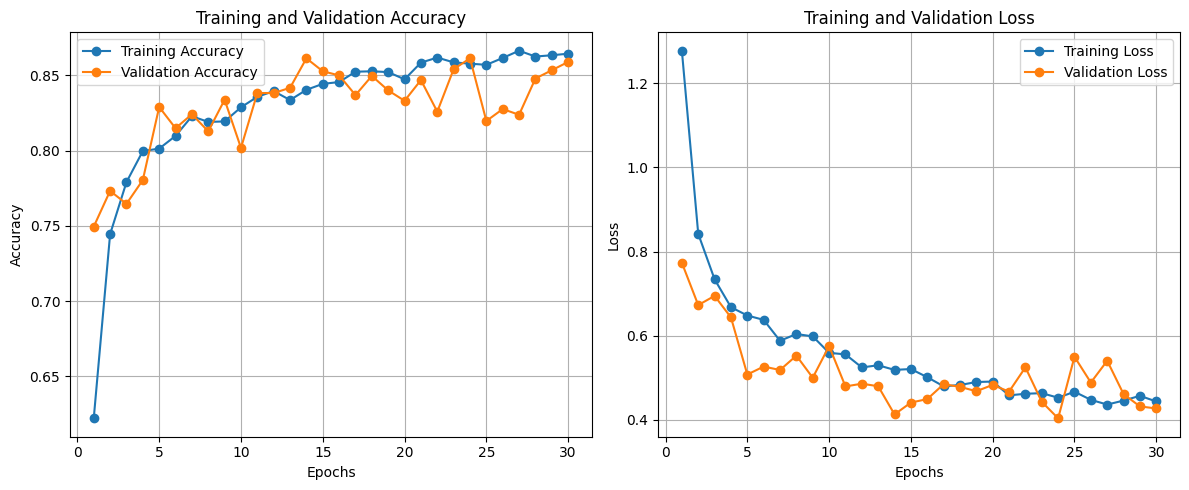

In [32]:
# Extracting accuracy and loss from the history
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [28]:
test_loss, test_accuracy = ensemble_model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 27s 239ms/step - accuracy: 0.8531 - loss: 0.4278
Test accuracy: 0.8499, Test loss: 0.4285


In [30]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = ensemble_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
y_test_numeric = np.array([int(label) for label in y_test])

# Print classification report
print(classification_report(y_test_numeric, y_pred_classes))


114/114 ━━━━━━━━━━━━━━━━━━━━ 34s 216ms/step
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       318
           1       0.95      0.76      0.84       382
           2       0.55      0.80      0.65       200
           3       0.84      0.71      0.77       354
           4       0.99      0.93      0.96      1071
           5       0.84      0.87      0.86       425
           6       0.72      0.77      0.74       281
           7       0.59      0.93      0.72        75
           8       0.85      0.74      0.79       191
           9       0.78      0.87      0.82       335

    accuracy                           0.85      3632
   macro avg       0.80      0.83      0.81      3632
weighted avg       0.87      0.85      0.85      3632

